In [1]:
import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Exploratory Data Analysis (EDA)

<Axes: >

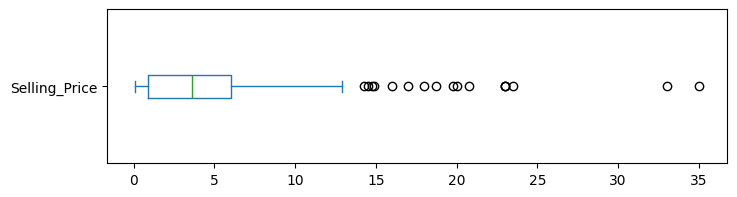

In [7]:
df["Selling_Price"].plot.box(vert=False, figsize=(8,2))

<Axes: >

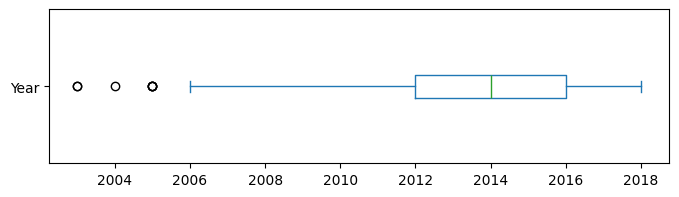

In [8]:
df["Year"].plot.box(vert=False, figsize=(8,2))

<Axes: >

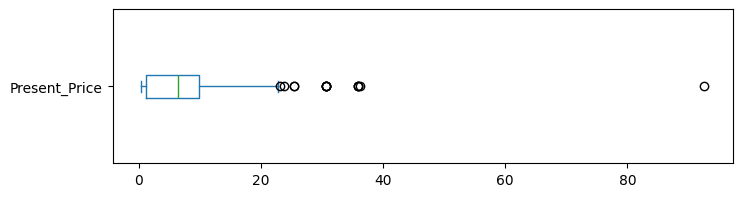

In [9]:
df["Present_Price"].plot.box(vert=False,figsize=(8,2))

<Axes: >

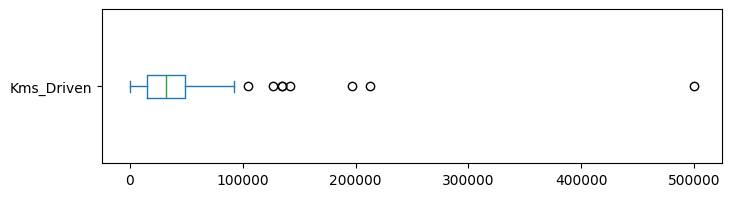

In [10]:
df["Kms_Driven"].plot.box(vert=False,figsize=(8,2))	

<Axes: >

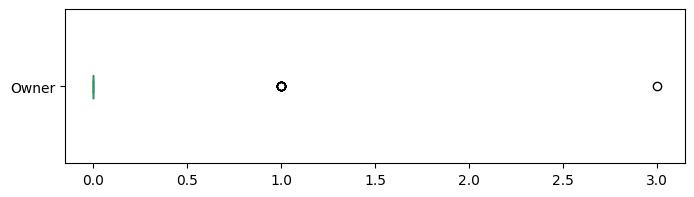

In [11]:
df["Owner"].plot.box(vert=False,figsize=(8,2))	

In [12]:
columns_to_filter = ["Year", "Selling_Price", "Present_Price", "Kms_Driven", "Owner"]
df_filtered = df.copy()
for column in columns_to_filter:
    Q1 = df_filtered[column].quantile(0.25)
    Q3 = df_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]  

In [13]:
df_filtered.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,261.000000,261.000000,261.000000,261.000000,261.0
mean,2013.988506,3.861494,6.103065,31336.379310,0.0
std,2.359079,3.090539,4.822646,20140.560576,0.0
min,2006.000000,0.120000,0.320000,500.000000,0.0
25%,2013.000000,0.900000,1.200000,15000.000000,0.0
50%,2015.000000,3.500000,5.900000,30000.000000,0.0
75%,2016.000000,5.850000,9.400000,45000.000000,0.0
max,2018.000000,12.900000,20.450000,88000.000000,0.0


In [14]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
cat_cols = [i for i in df.columns if df[i].dtype=="object"]
cat_cols

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [16]:
num_cols = [i for i in df.columns if df[i].dtype!="object"]
num_cols

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

# Encoding

In [17]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


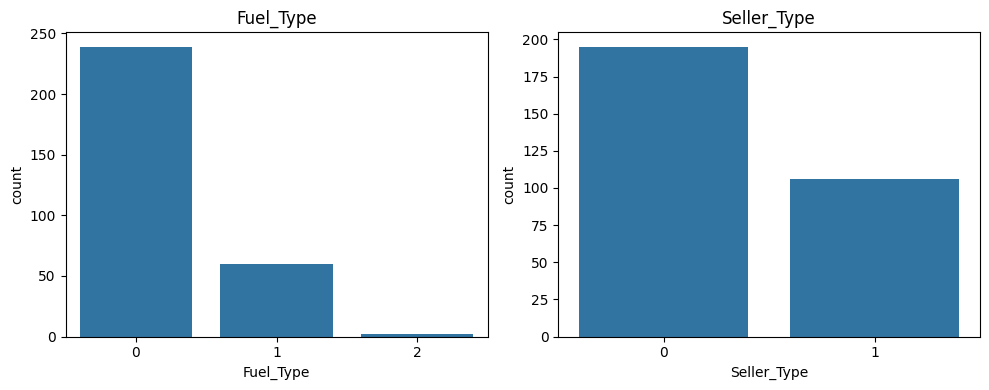

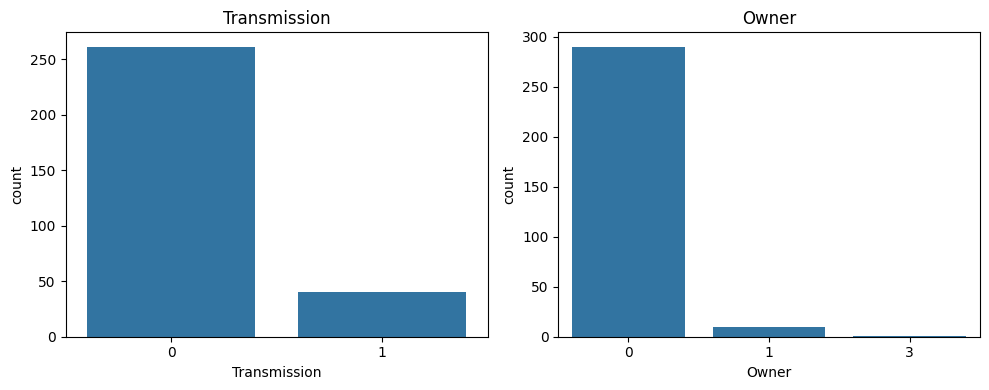

In [19]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission','Owner']
for i in range(0, len(cat_cols), 2):
    fig = plt.figure(figsize=[10, 4])
    plt.subplot(1, 2, 1)
    sns.countplot(x=cat_cols[i], data=df)
    plt.title(cat_cols[i])
    if i + 1 < len(cat_cols):
        plt.subplot(1, 2, 2)
        sns.countplot(x=cat_cols[i + 1], data=df)
        plt.title(cat_cols[i + 1])
    plt.tight_layout()
    plt.show()

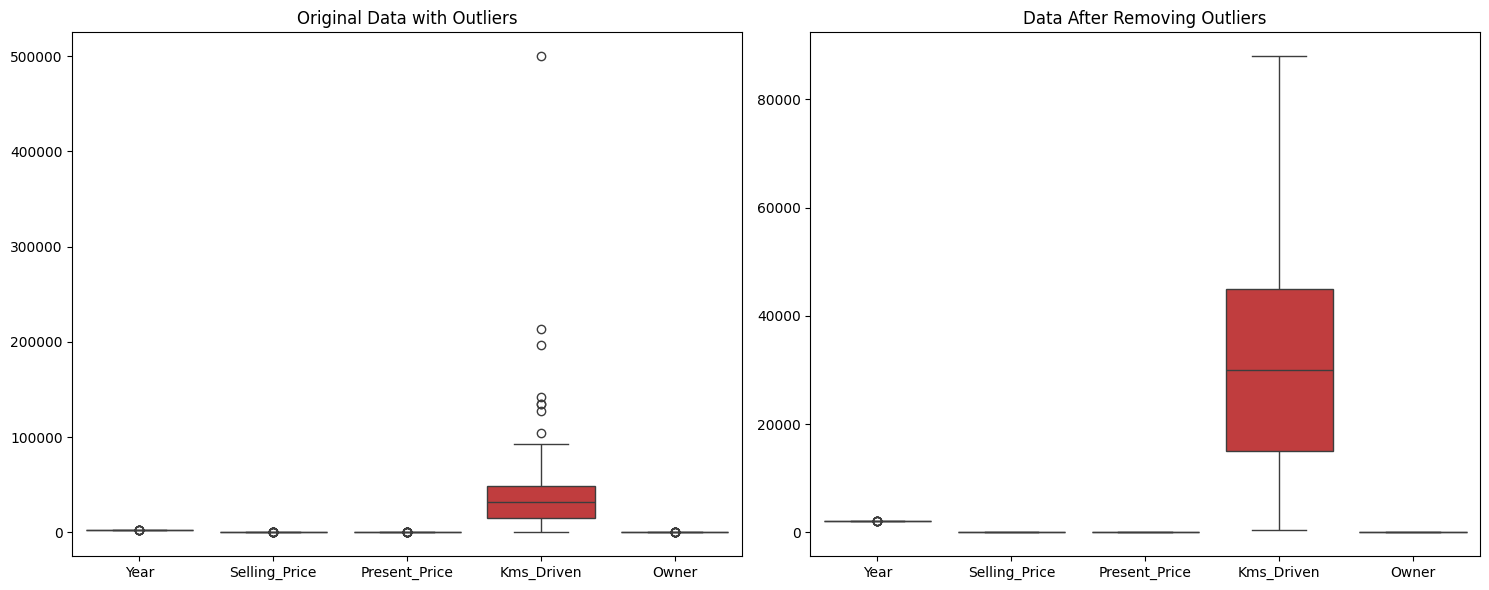

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(data=df[columns_to_filter], ax=axes[0])
axes[0].set_title("Original Data with Outliers")
sns.boxplot(data=df_filtered[columns_to_filter], ax=axes[1])
axes[1].set_title("Data After Removing Outliers")
plt.tight_layout()
plt.show()

In [21]:
df["Car_Name"].value_counts()

Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64

In [22]:
pd.crosstab(df["Fuel_Type"], df["Car_Name"])

Car_Name,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,...,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
Fuel_Type,,,,,,,,,,,,,,,,,,,,,
0,1,2,1,1,1,1,3,2,1,1,...,0,1,3,0,3,4,8,0,3,3
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,2,1,6,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [23]:
pd.crosstab(df["Transmission"], df["Car_Name"])

Car_Name,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,...,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
Transmission,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,1,1,3,2,1,1,...,1,1,4,1,5,5,13,1,4,3
1,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [24]:
numeric_df = df.select_dtypes(include=['number'])

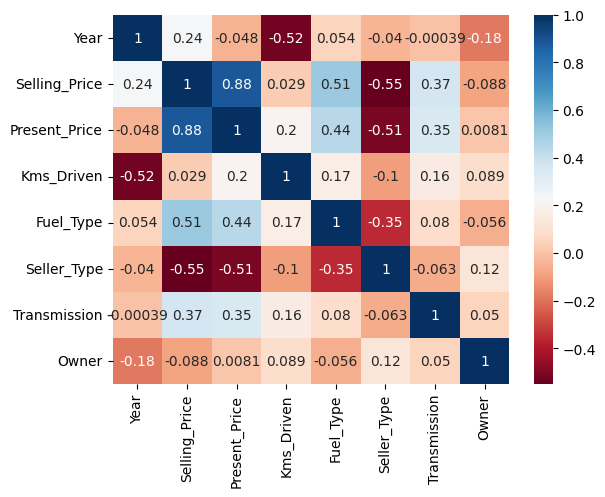

In [25]:
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdBu")
plt.show()

In [26]:
numeric_df.corr()['Selling_Price']

Year             0.236141
Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Fuel_Type        0.509467
Seller_Type     -0.550724
Transmission     0.367128
Owner           -0.088344
Name: Selling_Price, dtype: float64

In [27]:
df.pivot_table(values='Selling_Price', index = 'Seller_Type', columns= 'Fuel_Type')

Fuel_Type,0,1,2
Seller_Type,,,
0,5.252388,10.181525,3.1
1,0.726857,16.000000,NaN


<Axes: xlabel='Seller_Type'>

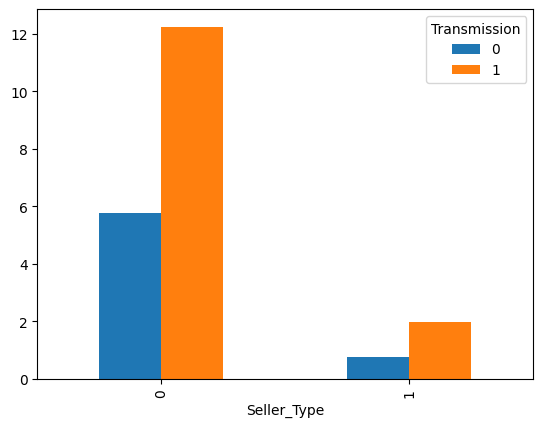

In [28]:
df.pivot_table(values='Selling_Price', index = 'Seller_Type', columns= 'Transmission').plot.bar()

# Data Preparation

In [29]:
df.drop(labels='Car_Name',axis= 1, inplace = True)

In [30]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


In [31]:
df_dum = pd.get_dummies(data = df,drop_first=True) 

In [32]:
df_dum.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


In [33]:
X=df.drop(['Selling_Price'],axis=1)
Y=df['Selling_Price']

In [34]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [35]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting Training and Test data

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

# Model Training

## Linear Regression

In [37]:
Model_1 = LinearRegression()

In [38]:
Model_1.fit(X_train,Y_train)

LinearRegression()

In [39]:
# pred on training data
train_data_pred = Model_1.predict(X_train)

In [40]:
# R Squared Error
error_score  = metrics.r2_score(Y_train,train_data_pred)

In [41]:
error_score

0.8799451660493708

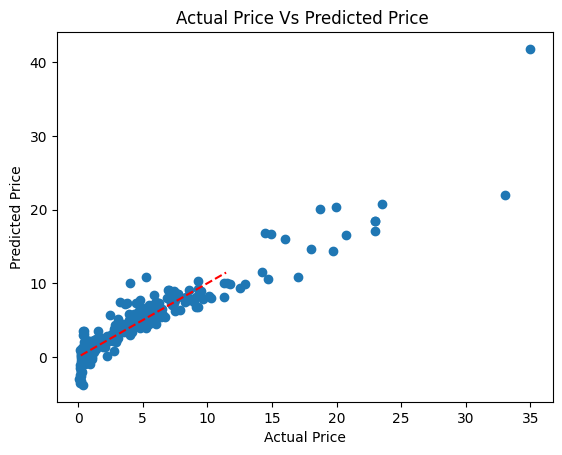

In [42]:
plt.scatter(Y_train,train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title("Actual Price Vs Predicted Price ")
plt.show()

In [43]:
# Pred on testing data
test_data_pred = Model_1.predict(X_test)

In [44]:
error_score = metrics.r2_score(Y_test,test_data_pred)

In [45]:
error_score

0.8365766715026374

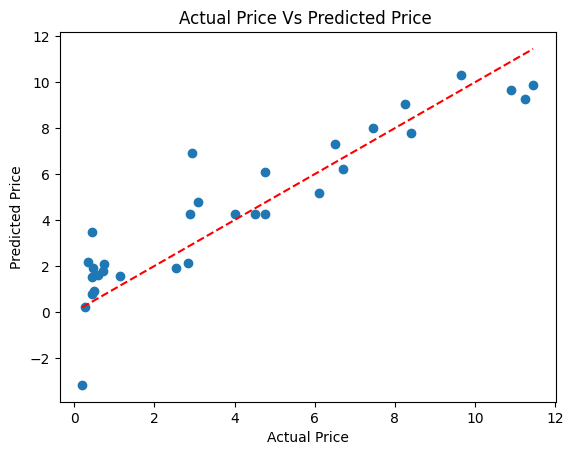

In [46]:
plt.scatter(Y_test,test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title("Actual Price Vs Predicted Price ")
plt.show()

## Lasso Regression

In [47]:
Model_2 = Lasso()

In [48]:
Model_2.fit(X_train,Y_train)

Lasso()

In [49]:
train_data_pred = Model_2.predict(X_train)

In [50]:
# R Squared Error
error_score  = metrics.r2_score(Y_train,train_data_pred)

In [51]:
error_score

0.8427856123435794

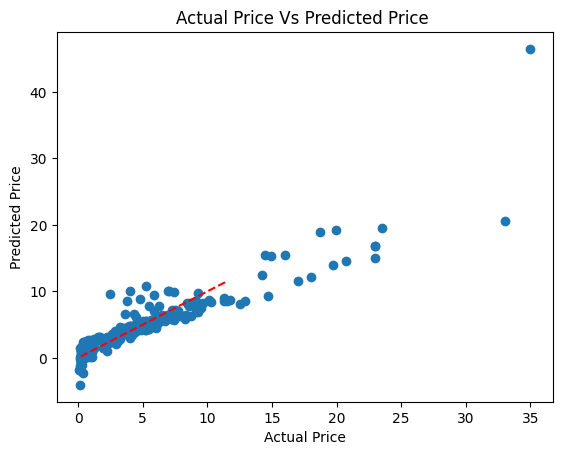

In [52]:
plt.scatter(Y_train,train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title("Actual Price Vs Predicted Price ")
plt.show()

In [53]:
# Pred on testing data
test_data_pred = Model_2.predict(X_test)

In [54]:
error_score = metrics.r2_score(Y_test,test_data_pred)

In [55]:
error_score

0.8709167941173195

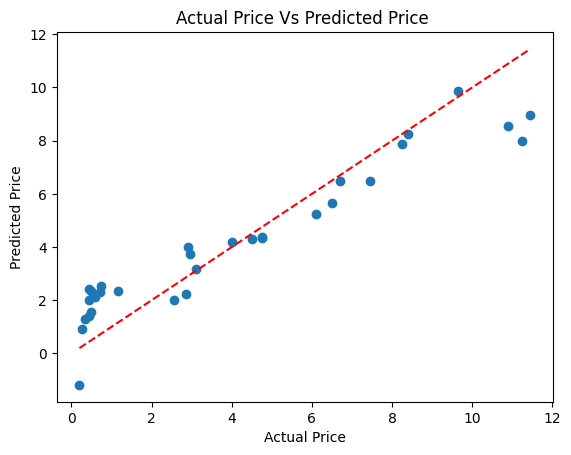

In [56]:
plt.scatter(Y_test,test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title("Actual Price Vs Predicted Price ")
plt.show()

# 

# RandomForestRegressor

In [57]:
Model_3 = RandomForestRegressor(n_estimators=100, random_state=42)
Model_3.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [58]:
# For test
y_pred = Model_3.predict(X_test)

In [59]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(Y_test, y_pred)

In [60]:
print("Random Forest Model Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Random Forest Model Performance:
Mean Absolute Error (MAE): 0.3423
Mean Squared Error (MSE): 0.2558767700000006
Root Mean Squared Error (RMSE): 0.50584263363224
R^2 Score: 0.9805517643053386


In [61]:
# For training
y_pred = Model_3.predict(X_train)

In [62]:
mae = mean_absolute_error(Y_train, y_pred)
mse = mean_squared_error(Y_train, y_pred)
rmse = mse ** 0.5
r2 = r2_score(Y_train, y_pred)

In [63]:
print("Random Forest Model Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Random Forest Model Performance:
Mean Absolute Error (MAE): 0.24359037037037023
Mean Squared Error (MSE): 0.38998847540740705
Root Mean Squared Error (RMSE): 0.624490572712997
R^2 Score: 0.9856337653136535


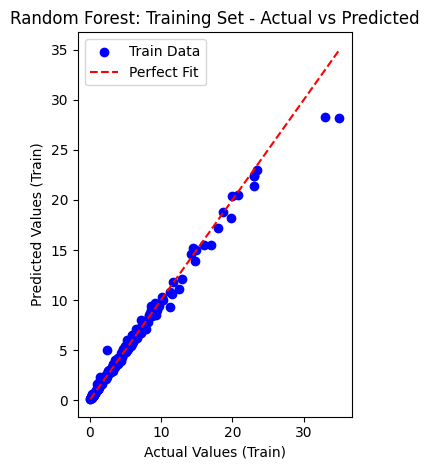

In [77]:
# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(Y_train, y_pred, color='blue', label='Train Data')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='red', linestyle='--', label="Perfect Fit")
plt.title('Random Forest: Training Set - Actual vs Predicted')
plt.xlabel('Actual Values (Train)')
plt.ylabel('Predicted Values (Train)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

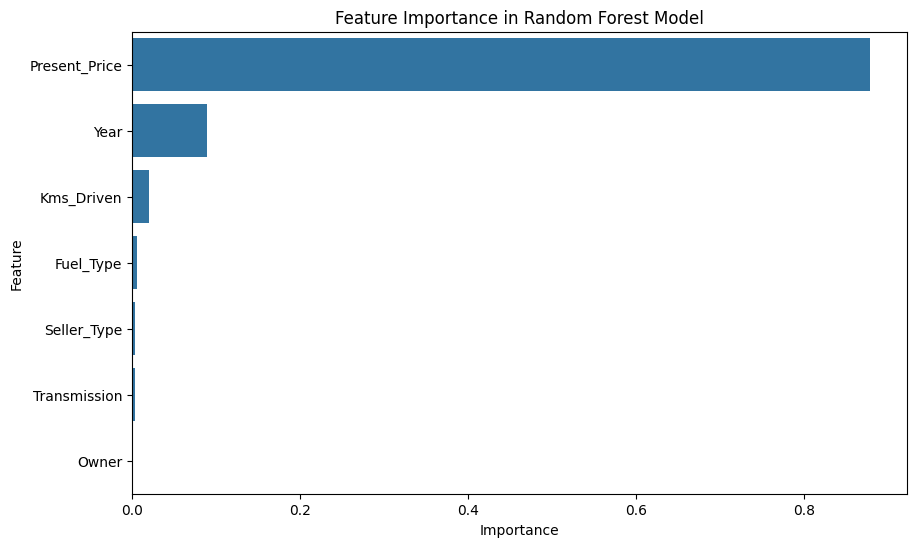

In [74]:
feature_importances = Model_3.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Conclusion

* Models Used:-  Linear Regression, Lasso Regression, and Random Forest were employed for prediction.
* Evaluation Metrics:-  Metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score were used to evaluate model performance.
* Feature Importance:- Random Forest identified key features impacting car prices, presented using a bar plot.
* Performance Visualization:- Scatter plots compared actual vs. predicted values, showing the models' ability to fit the data.
* Conclusion:- Random Forest likely emerged as the most effective model due to its ability to handle complex relationships, as indicated by its feature importance and performance metrics.